# Notes on Fuchs and Franks, 2010 (FF10)

This paper is a good starting point for trying to define a parameterization for the size distribution of phytoplankton functional types (PFTs). This notebooks will require several python packages.

In [1]:
#import math
#import matplotlib
import numpy as np
#from scipy import stats
#from scipy.stats import lognorm
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0) # Large figures

## Notes on Eq. (1)

Eq. (1) is actually three equations:

*N(t) = N<sub>T</sub> -* Int(*P(x,t)dx*) - Int(*Z(x,t)dx*)

* *t* is time
* *N(t)* is nitrogen concentration (micromols)
* *N<sub>T</sub>* is total nitrogen in the system (1-30 micromol)
* *x* is equivalent spherical diameter (ESD); a measure of the size of PFT class
* *P(x,t)* is total phytoplankton biomass
* *Z(x,t)* is total zooplankton biomass

*dP(x,t)/dt = P(x,t) (-lambda + mu*<sub>max</sub>*(x) N(t)/(N(t) + k*<sub>s</sub>*) - g* Int(*F<sup>-</sup>(x,y)Z(y,t)dy*))

* *lambda*  is phytoplankton mortality rate
* *mu*<sub>max</sub> is maximum phytoplankton growth rate
* *k*<sub>s</sub> is half-saturation constant
* *g* is feeding rate
* *F*<sup>-</sup> is a feeding kernel (FF2010 uses Laplace distribution)

*dZ(x,t)/dt = Z(x,t) (-lambda - g* Int(*F<sup>-</sup>(x,y)Z(y,t)dy*) + *gamma g* Int(*F<sup>+</sup>(x,y)(P(y,t) + Z(y,t))dy*))

* *gamma* is assimilation efficiency
* *F*<sup>+</sup> is a redistibution kernel


## Our goal

Rather than divide *x* into bins and carry around tracers for *P* and *Z* in each size category, can we come up with a distribution for *P* and *Z* and then just transport total mass and total count?

## Where to start

Let *m* denote the biomass of a given PFT. There is some mapping *G(m)* such that *G(m)* = ESD. For now, we'll use the Rodriguez and Mullin, 1986 (RM86) formulation.

Note that RM86 provides mass in the range [10<sup>-4</sup> micrograms, 10<sup>4</sup> micrograms], and which corresponds to a range of [10<sup>0.7</sup> micrometers, 10<sup>4.3</sup> micrometers]. Converting everything to *mks*, [10<sup>-13</sup> kg, 10<sup>-5</sup> kg] corresponds to the range [10<sup>-5.3</sup> m, 10<sup>-1.7</sup> m] which we verify below.

Range for ESD (in m):  -5.29147982063 -1.70403587444


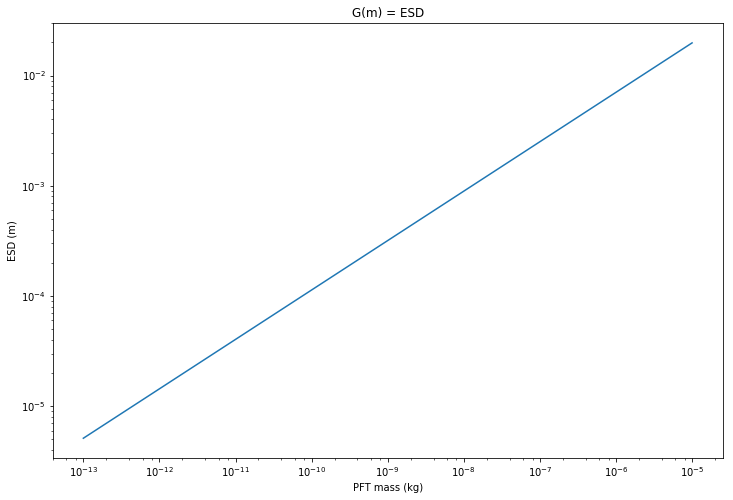

In [2]:
# m is biomass in units of kg
m = 10**(np.linspace(-13, -5, num=100))

# G: kg -> m
def G(m):
    # (Eq. on page 363 in RM86)
    #
    # log wt [10^-9 kg] = 2.23 log length [10^-6 m] - 5.58
    # 
    # We want length as function of mass
    # log length [10^-6 m] = (log wt [10^-9 kg] + 5.58) / 2.23
    return 10**((np.log10(m)+5.58+9)/2.23-6)
    #return 10**((np.log10(m*(10**-9)) + 5.58) / 2.23-6)

x = G(m)
print "Range for ESD (in m): ", np.min(np.log10(x)), np.max(np.log10(x))

plt.loglog(m,x);
plt.title('G(m) = ESD'); plt.xlabel('PFT mass (kg)'); plt.ylabel('ESD (m)');

It looks like FF10 assumes P(x,t) is time-invariant and log-linear.

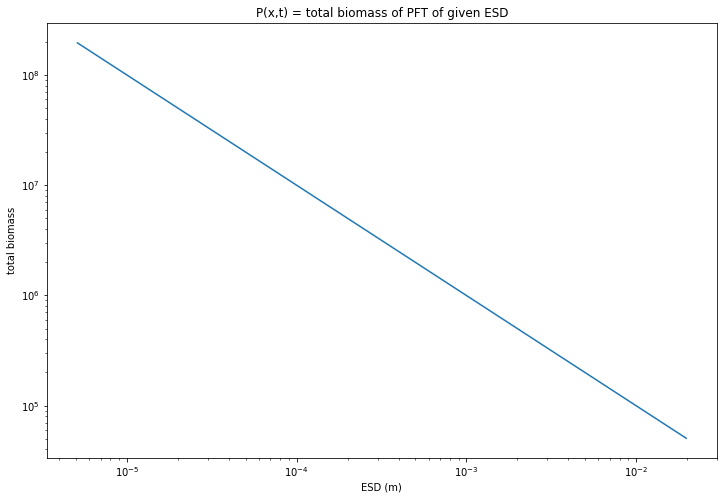

In [3]:
def P(x):
    slope = -1
    intercept = 10**3
    return 10**(slope*np.log10(x)+np.log10(intercept))

plt.loglog(x, P(x));
plt.title('P(x,t) = total biomass of PFT of given ESD'); plt.xlabel('ESD (m)'); plt.ylabel('total biomass');